In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/My\ Drive/08\ -\ ReceptiveFields\ and\ Network\ Architecture\

/content/drive/My Drive/08 - ReceptiveFields and Network Architecture


# Imports
Importing necessary packages and modules

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from dataset.DataLoader import cifar10_dataset, dataset_classes
from dataset.DataDownloader import download_cifar10_dataset
from models.Utility import cross_entropy_loss, sgd_optimizer, model_summary, initialize_cuda, nll_loss
from models.Resnet import resnet18
from models.Test import testModel
from models.Train import trainModel
from Plotter import plot_graph



In [4]:
class Params:

    num_workers = 4
    batchsize = 64
    dropout = 0.1
    random_seed = 1
    epochs = 50
    learning_rate = 0.01
    momentum = 0.9

Files already downloaded and verified


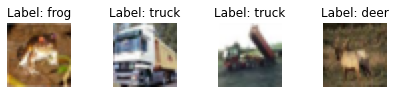

In [5]:
# Download data
cifar_dataset = download_cifar10_dataset()
classes = dataset_classes()
sample_data, sample_targets = cifar_dataset.data, cifar_dataset.targets

# Get image size
image_size = np.transpose(sample_data[5], (2, 0, 1)).shape

# Set number of images to display
num_images = 4

# Display images with labels
fig, axs = plt.subplots(1, 4, figsize=(6, 6))
fig.tight_layout()

for i in range(num_images):
    axs[i].axis('off')
    axs[i].set_title(f'Label: {classes[sample_targets[i]]}')
    axs[i].imshow(sample_data[i])

In [6]:
# Initialize CUDA and set random seed
cuda, device = initialize_cuda(Params.random_seed)

GPU Available? True


In [7]:
# Create train data loader
train_loader = cifar10_dataset(
    Params.batchsize, cuda, Params.num_workers, train=True
)

# Create val data loader
test_loader = cifar10_dataset(
    Params.batchsize, cuda, Params.num_workers, train=False
)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
model = resnet18().to(device)  # Create model
model_summary(model, image_size)  # Display model summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [9]:
  losses = []
  accuracies = []
  incorrect_samples = []

  loss_fun = cross_entropy_loss() 
  optimizer = sgd_optimizer(model, Params.learning_rate, Params.momentum)  # Create optimizer
  for epoch in range(1, Params.epochs + 1):
      print(f'Epoch {epoch}:')
      trainModel(model, train_loader, device, optimizer, loss_fun)
      testModel(model, test_loader, device, loss_fun, losses, accuracies, incorrect_samples)

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 1:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0185, Accuracy: 6046/10000 (60.46%)

Epoch 2:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0121, Accuracy: 7403/10000 (74.03%)

Epoch 3:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0112, Accuracy: 7578/10000 (75.78%)

Epoch 4:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0114, Accuracy: 7678/10000 (76.78%)

Epoch 5:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0098, Accuracy: 8070/10000 (80.70%)

Epoch 6:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0105, Accuracy: 8138/10000 (81.38%)

Epoch 7:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0114, Accuracy: 7980/10000 (79.80%)

Epoch 8:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0112, Accuracy: 8177/10000 (81.77%)

Epoch 9:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0129, Accuracy: 8102/10000 (81.02%)

Epoch 10:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0129, Accuracy: 8161/10000 (81.61%)

Epoch 11:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0139, Accuracy: 8215/10000 (82.15%)

Epoch 12:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0126, Accuracy: 8266/10000 (82.66%)

Epoch 13:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0122, Accuracy: 8433/10000 (84.33%)

Epoch 14:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0137, Accuracy: 8318/10000 (83.18%)

Epoch 15:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0130, Accuracy: 8394/10000 (83.94%)

Epoch 16:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0128, Accuracy: 8392/10000 (83.92%)

Epoch 17:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0136, Accuracy: 8392/10000 (83.92%)

Epoch 18:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0126, Accuracy: 8472/10000 (84.72%)

Epoch 19:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0131, Accuracy: 8471/10000 (84.71%)

Epoch 20:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0136, Accuracy: 8430/10000 (84.30%)

Epoch 21:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0130, Accuracy: 8529/10000 (85.29%)

Epoch 22:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0128, Accuracy: 8561/10000 (85.61%)

Epoch 23:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0134, Accuracy: 8490/10000 (84.90%)

Epoch 24:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0133, Accuracy: 8524/10000 (85.24%)

Epoch 25:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0134, Accuracy: 8523/10000 (85.23%)

Epoch 26:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0138, Accuracy: 8514/10000 (85.14%)

Epoch 27:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0133, Accuracy: 8507/10000 (85.07%)

Epoch 28:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0135, Accuracy: 8528/10000 (85.28%)

Epoch 29:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0134, Accuracy: 8546/10000 (85.46%)

Epoch 30:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0135, Accuracy: 8546/10000 (85.46%)

Epoch 31:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0134, Accuracy: 8555/10000 (85.55%)

Epoch 32:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0134, Accuracy: 8575/10000 (85.75%)

Epoch 33:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0142, Accuracy: 8495/10000 (84.95%)

Epoch 34:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0139, Accuracy: 8527/10000 (85.27%)

Epoch 35:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0137, Accuracy: 8548/10000 (85.48%)

Epoch 36:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0136, Accuracy: 8549/10000 (85.49%)

Epoch 37:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0137, Accuracy: 8551/10000 (85.51%)

Epoch 38:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0136, Accuracy: 8580/10000 (85.80%)

Epoch 39:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0136, Accuracy: 8564/10000 (85.64%)

Epoch 40:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0135, Accuracy: 8582/10000 (85.82%)

Epoch 41:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0136, Accuracy: 8574/10000 (85.74%)

Epoch 42:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0135, Accuracy: 8568/10000 (85.68%)

Epoch 43:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0137, Accuracy: 8570/10000 (85.70%)

Epoch 44:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0135, Accuracy: 8574/10000 (85.74%)

Epoch 45:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0136, Accuracy: 8565/10000 (85.65%)

Epoch 46:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0138, Accuracy: 8559/10000 (85.59%)

Epoch 47:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0136, Accuracy: 8577/10000 (85.77%)

Epoch 48:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0137, Accuracy: 8571/10000 (85.71%)

Epoch 49:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0138, Accuracy: 8560/10000 (85.60%)

Epoch 50:


Loss=0.00 Batch_ID=781 Accuracy=100.00: 100%|██████████| 782/782 [01:07<00:00, 11.58it/s]



Validation set: Average loss: 0.0137, Accuracy: 8561/10000 (85.61%)



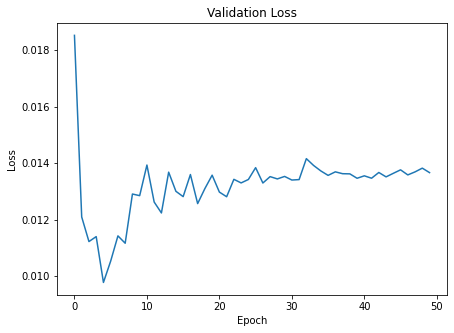

In [10]:
plot_graph(losses, "Loss")

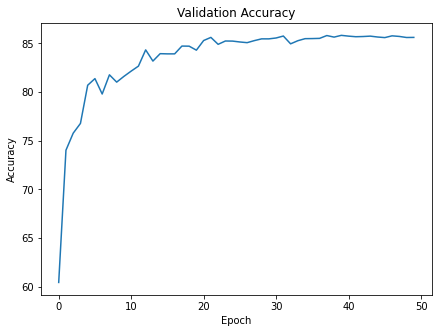

In [11]:
plot_graph(accuracies, "Accuracy")